In [50]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Load the dataset
train_data = pd.read_csv('C:\\Users\\PMLS\\1.python\\MNIST OPEN ENDED LAB\\mnist_train.csv')
test_data = pd.read_csv('C:\\Users\\PMLS\\1.python\\MNIST OPEN ENDED LAB\\mnist_test.csv')

In [2]:
print(train_data.head())

   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]


In [3]:
print(test_data.head())

   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      7  
1    0      2  
2    0      1  
3    0      0  
4    0      4  

[5 rows x 785 columns]


In [36]:
print(train_data.isnull().sum())

0        0
1        0
2        0
3        0
4        0
        ..
780      0
781      0
782      0
783      0
label    0
Length: 785, dtype: int64


In [37]:
train_data.fillna(train_data.median(), inplace=True)
test_data.fillna(test_data.median(), inplace=True)

In [38]:
# Encode categorical variables (if any)
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

In [39]:
# Align the columns of the testing data to match the training data
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [40]:
# Separate features (X) and target (y) for both datasets
X_train = train_data.drop('label', axis=1) 
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label'] 

In [41]:
print(train_data.columns)
print(test_data.columns)

print(X_train.shape, y_train.shape)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', 'label'],
      dtype='object', length=785)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', 'label'],
      dtype='object', length=785)
(60000, 784) (60000,)


In [52]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

C:\Users\PMLS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [53]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.92


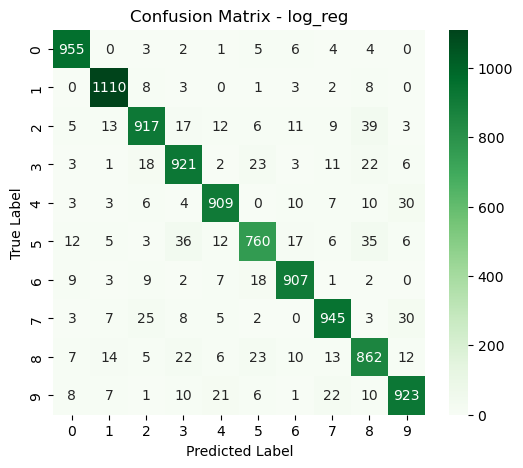

Classification Report - log_reg:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.85      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [54]:
# Compute confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for KNN
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - log_reg")
plt.show()

# Classification report for KNN
print("Classification Report - log_reg:")
print(classification_report(y_test, y_pred))

In [42]:
# Train the model using KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [43]:
# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")


C:\Users\PMLS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.97


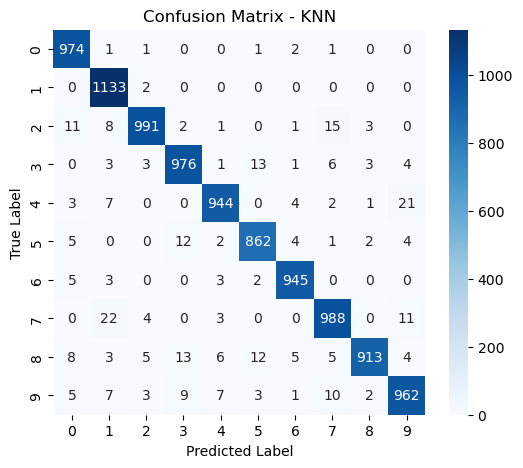

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [44]:
# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for KNN
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()

# Classification report for KNN
print("Classification Report - KNN:")
print(classification_report(y_test, y_pred))

In [45]:
# Train the model using naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [46]:
# Evaluate the model
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")


Naive Bayes Accuracy: 0.56


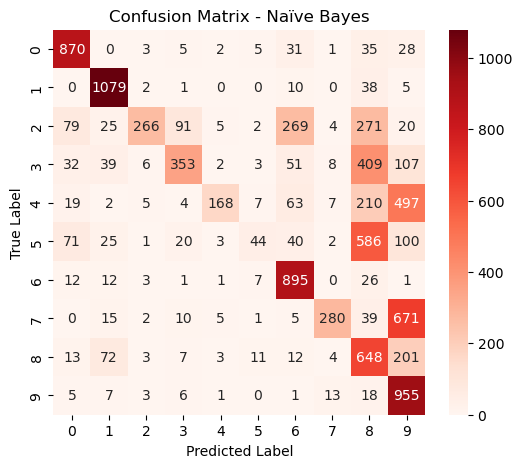

Classification Report - Naïve Bayes:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



In [47]:
# Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for Naïve Bayes
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Reds", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

# Classification report for Naïve Bayes
print("Classification Report - Naïve Bayes:")
print(classification_report(y_test, y_pred))